# Shlukování

In [3]:
#obecné nastavení
barva=["#2E2300","#DB9501","#375E97","#3F681C","#C05805"]

## 1. Otázka

Sem převeďte zadání do smysluplných otázek, které chcete odpovědět.

## 2. Průzkumová analýza dat

Průzkumová analýza je uceleně a detailně provedena v rámci skriptu **02 Průzkumová Analýza Dat**.

### 2.1 Načtení a předzpracování dat

Postup je následující:

* Načtení původních dat z .csv souboru.
* Vyřešení NaN hodnot. Takový řádek je jediný a vzhledem k množství dat jej není nutné nahrazovat a proto je odstraněn.
* Vyřešení odlehlých pozorování. Jedno pozorování je evidentně nesmyslné a proto je odstraněno. Opět vzhledem k množství dat je tato ztráta zanedbatelná.
* V zadání nebyly specifikovány jednotky, původní nedávaly smysl, byly různé jednou v cm, jednou v mm. Jednotky byly sjednoceny na cm a sloupce přejmenovány.

In [4]:
#sem vyplňtě postup vytvoření čisté sady CO NEJÚSPORNĚJI, 
#detailní postupa a analýza pro případného zájemce je v příslušném notebooku

#umístění souboru
soubor="R:/-DigitalAcademy-/Clustering/trickaData.csv"

#import knihovny
import pandas as pd

#načtení dat
hrubaData=pd.read_csv(soubor)

#vytvořím kopii bez posledních dvou pozorování - outlier a řádek obsahující NaN
cistaData=hrubaData[0:200].copy()

#převod z mm na cm
cistaData["Delka"]=cistaData["Delka"]/10

#přejmenování
cistaData.rename(columns={"Sirka":"Sirka [cm]","Delka":"Delka [cm]"},inplace=True)

In [5]:
#zobrazení
cistaData.head()

,Cislo,Sirka [cm],Delka [cm]
0,1,45.99,66.25
1,2,43.64,66.15
2,3,56.83,69.12
3,4,53.90,66.27
4,5,35.87,70.38


### 2.2 Vizualizace dat

Po předzpracování data vypadají následovně.

<IPython.core.display.Javascript object>


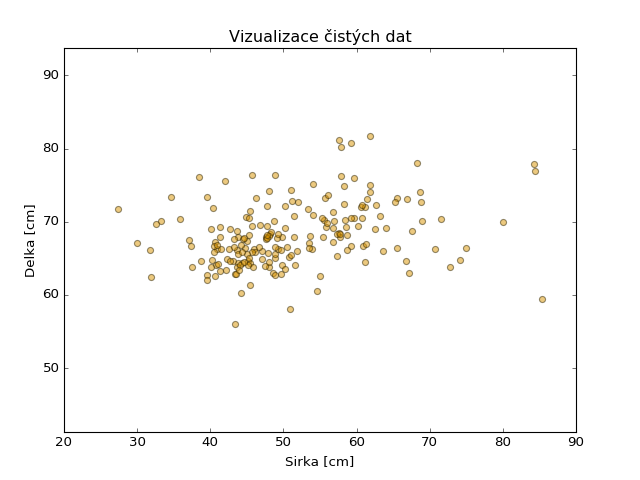

(20.0, 90.0, 50.0, 85.0)

In [6]:
#sem vložte kód, který data zobrazí.

# import knihovny
import matplotlib.pyplot as plt

%matplotlib notebook

#vytáhnu si obě datové sady - lepší opakovatelnost kódu.
x=cistaData["Sirka [cm]"]
y=cistaData["Delka [cm]"]

#základ obrázku
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])

#bodový obrázek
ax.scatter(
        x=x,
        y=y,
        c=barva[1],
        s=30,
        alpha=0.5,
        edgecolors=barva[0]
)

#pojmenování os
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
ax.set_title("Vizualizace čistých dat")

#nastavení os
plt.axis("equal")
#ax.set_xlim([])
#ax.set_ylim([])

## 3. Modelování

Modelování je uceleně a detailně provedeno v rámci skriptu **03 Modelování**.

Otázky jsme se rozhodli zodpovědět pomocí shlukování, konktrétně modelu k-means (k-středů). Pro posouzení optimálního počtu shluků bylo provedeno následující:

* Optická validace a konzultace s doménovým expertem.
* Metoda "lokte".
* Jako optimální velikosti byly voleny středy shluků.

Vzhledem k povaze problému je algoritmus k-středů s Euklidovskou metrikou výbornou volbou, protože dává kompaktní shluky kulovitého charakteru.

<IPython.core.display.Javascript object>


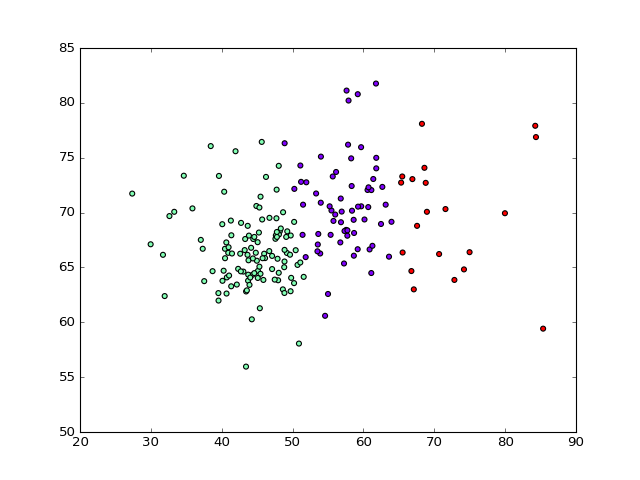

In [7]:
#zde vyplňtě kód pro jeden vámi zvolený shluk

#import knihovny
from sklearn.cluster import KMeans

#vytvořím objekt
kmeansModelTricka = KMeans(n_clusters = 3)

#nafituji data
kmeansModelTricka.fit(cistaData[["Sirka [cm]","Delka [cm]"]])

#vykreslení
obrShluk = plt.figure()
ax = obrShluk.add_subplot()
plt.scatter(cistaData["Sirka [cm]"],cistaData["Delka [cm]"],c=kmeansModelTricka.labels_,cmap='rainbow')

<IPython.core.display.Javascript object>


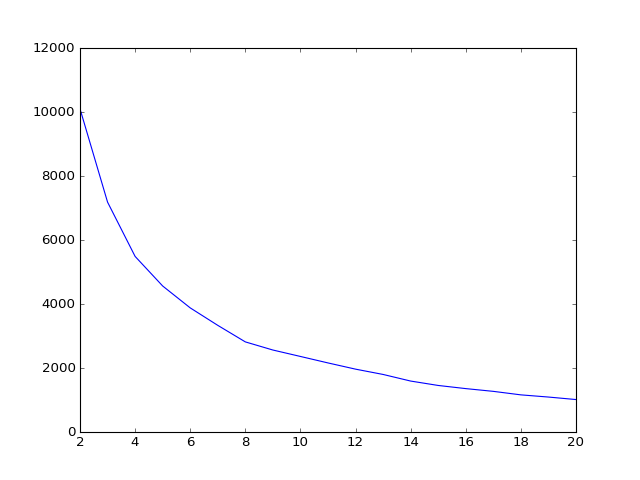

In [10]:
#zde vyplňte kód pro volbu optimálního počtu shluků pomocí metody "lokte".

vektorK = range(2,21)
kvalita = [0]*len(vektorK)
i=0
for pocetShluku in vektorK:
    #ZDE DOPLŇUJTE KÓD ----------------------------------------------------------------
    #vytvořím objekt
    kmeansModelTricka = KMeans(n_clusters = pocetShluku)
    #nafituji data
    kmeansModelTricka.fit(cistaData[["Sirka [cm]","Delka [cm]"]])
    #uložím si do proměnné kvalitu shlukování.
    kvalita[i]=-kmeansModelTricka.score(cistaData[["Sirka [cm]","Delka [cm]"]])
    #----------------------------------------------------------------------------------
    i=i+1
    
#vykreslení
obrKvalita = plt.figure()
ax = obrKvalita.add_subplot()
plt.plot(vektorK,kvalita)

## 4. Interpretace

Zde vyplťe vaši interpretaci výsledků a doporučení pro management firmy.

## 5. Komunikace výsledků